# Child following the Mother
A simple program where an agent child is following the agent mother.

Importing model, Agent and activation type and space type.
The activation type is the normal scheduler
The space is the grid in multidimensional

In [1]:
from mesa import Model, Agent
from mesa.time import BaseScheduler
from mesa.space import MultiGrid
import random

The class of the agent Mother which in the beginning is in a random position

In [2]:
class MotherAgent(Agent):
    """ Both agents with fixed position in the beginning"""
    def __init__(self, unique_id):
        self.unique_id = unique_id
        
    def step(self, model):
        # Each agent move one step forward
        self.move(model)
        
    def move(self, model):
        grid = model.grid
        x, y = self.pos
        possible_steps = grid.get_neighborhood((x, y), moore=True, include_center=True)
        choice = random.choice(possible_steps)
        grid.move_agent(self, choice)

The class of the agent Child where the agent moves towards the agent Mother

In [3]:
class ChildAgent(Agent):
    def __init__(self, unique_id, mother):
        self.unique_id = unique_id
        self.mother = mother
        
    def step(self, model):
        # Follow the mother
        self.move(model)
            
    def move(self, model):
        #Get distance from the mother
        x, y = self.pos
        mX, mY = self.mother.pos
        dX = x-mX; dY = y-mY;
        vX = 0; vY = 0; 
        if abs(dX) > 0:
            vX = dX/abs(dX)
        if abs(dY) > 0:
            vY = dY/abs(dY);
        
        newX = round(x - vX); newY = round(y - vY);
        model.grid.move_agent(self, (newX, newY))


The model class where we create the agents (Mother and child) activate the scheduler

In [4]:
class FollowModel(Model):
    """A model with some two agents 0=Mother 1=child."""
    def __init__(self, width, height, torus):
        self.grid = MultiGrid(height, width, torus)
        
        self.schedule = BaseScheduler(self)
        self.create_agents()
        
    def create_agents(self):
        m = MotherAgent(1)
        self.schedule.add(m)
        self.grid.place_agent(m, (5, 5)) # Mother
        c = ChildAgent(2, m)
        self.schedule.add(c)
        self.grid.place_agent(c, (1, 0)) # Child
        
           
    def step(self):
        # The scheduler's step method activates the step methods of all the agents according to the order it has created
        self.schedule.step()
    
    def run_model(self, steps):
        # Because the model has no inherent end conditions,
        # the user must specify how many steps to run it for.
        for i in range(steps):
            self.step()

Defining a function to show the position of the agents and plotting the grid

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def print_grid(model):
    follow_grid = np.zeros((follow_model.grid.width, follow_model.grid.height))

    for cell in follow_model.grid.coord_iter():
        cell_content, x, y = cell
        for i,a in enumerate(cell_content):
            follow_grid[y][x] += a.unique_id

    plt.imshow(follow_grid, interpolation='nearest')
    plt.grid(True)
    plt.show()


Showing the grid for 10 times to show the movement of child towards mother gradually

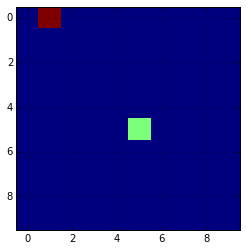

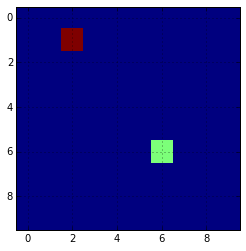

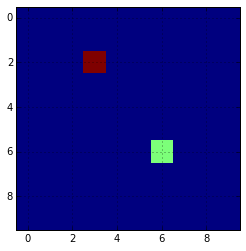

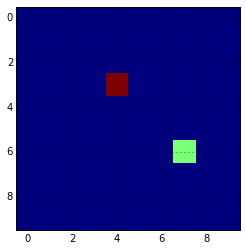

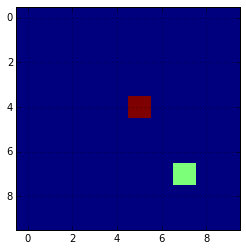

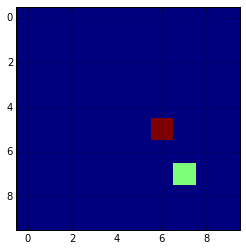

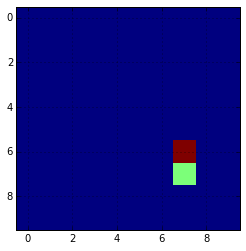

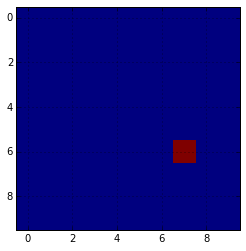

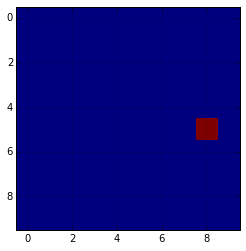

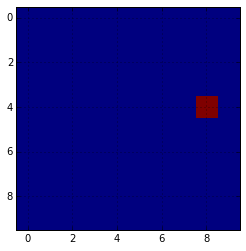

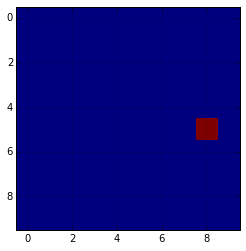

In [6]:
follow_model = FollowModel(width=10, height=10, torus=False)
print_grid(follow_model)
for i in range(10):
    follow_model.run_model(1)
    print_grid(follow_model)